This script is used to analyze data and produce Suplementary Information of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM



# Colab Notebook to generate julia simulations
## follow the steps in order


## Mount Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Julia in server

In [ ]:
# Installation cell
#%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.4-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'

echo 'Done'

┌ Warning: The Pkg REPL mode is intended for interactive use only, and should not be used from scripts. It is recommended to use the functional API instead.
└ @ Pkg.REPLMode /cache/build/default-aws-shared0-3/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/REPLMode/REPLMode.jl:379
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JLLWrappers ───── v1.5.0
   Installed Preferences ───── v1.4.0
   Installed Conda ─────────── v1.9.1
   Installed ZMQ ───────────── v1.2.2
   Installed Parsers ───────── v2.7.2
   Installed PrecompileTools ─ v1.2.0
   Installed IJulia ────────── v1.24.2
   Installed JSON ──────────── v0.21.4
   Installed VersionParsing ── v1.3.0
   Installed SoftGlobalScope ─ v1.1.0
   Installed libsodium_jll ─── v1.0.20+0
   Installed ZeroMQ_jll ────── v4.3.4+0
   Installed MbedTLS ───────── v1.1.7
  Downloaded artifact: ZeroMQ
  Downloaded artifact: libso

## Restart session to load Julia kernel

Go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.7* in Runtime type. \\
Note: if you change hardware acceleration will restart whole session (need to reinstall Julia).







##### Checking Julia version

In [ ]:
VERSION

v"1.8.4"

In [ ]:
#using Pkg;ENV["JUPYTER"]="/usr/local/bin/python"; pkg"add Distributions,Plots,StatsBase,PyPlot;precompile"
using Pkg; pkg"add Distributions,PyPlot,Plots,StatsBase,StatsPlots,LaTeXStrings,GLM,DataFrames;precompile"
#GR,,LaTeXStrings,StatsPlots,PyPlot,PyCall
#using Pkg; pkg"add Distributions,StatsBase,PyCall,Plots,PyPlot;precompile"


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed GLM ─────────── v1.8.3
   Installed ShiftedArrays ─ v2.0.0
   Installed StatsModels ─── v0.7.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [38e38edf] + GLM v1.8.3
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [38e38edf] + GLM v1.8.3
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.2
Precompiling project...
  ✓ ShiftedArrays
  ✓ StatsModels
  ✓ GLM
  3 dependencies successfully precompiled in 6 seconds. 195 already precompiled. 1 skipped during auto due to previous errors.
Precompiling project...
  ✓ DataFrames
  1 dependency successfully precompiled in 46 seconds. 198 already precompiled.


In [1]:
using Serialization
using Distributions,StatsBase,Printf,Random,GLM,DataFrames
using PyCall
using Plots,StatsPlots
using Serialization
using LaTeXStrings
using Plots.PlotMeasures
Plots.scalefontsizes(1.25)
Plots.backend()
#ntx = pyimport("networkx")
plt = pyimport("matplotlib.pyplot")
pyplot()

Plots.PyPlotBackend()

In [2]:

rootDir="drive/MyDrive/SYNC_Projects/"
#rootDir="/home/charly/Lab/Projects/"  ### only for local run

rootDir=rootDir*"pBGT/GIT/"

source_path=rootDir*"code/ABM/source/"
workingDir=rootDir*"code/Supplementary/"
pathData=rootDir*"data/sim_data/"

pathFigures=rootDir*"figures/SupplementaryInformation/"


"/home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/"

In [3]:
using Distributed
include(source_path*"ModelParameters.jl")
include(source_path*"Bacterias.jl")
include(source_path*"CellularFunctions.jl")
include(source_path*"Simulator.jl")
include(source_path*"AnalysisFunctions.jl")
include(source_path*"PlottingFunctions.jl")
include(source_path*"Auxiliary.jl")

In [4]:

if ~isdir(pathFigures)
    mkdir(pathFigures)
    println("Creating ",pathFigures)
end

## SI Figure 2

In [7]:

u(r)=Vmax*r/(Km+r)

R=1.

rs=Float16[]
urs=Float32[]
i=0
is=Int32[]
while(R>1e-5)
    uR=u(R)
    R-=uR
    if(mod(i,10000)==0)
        push!(rs,R)
        push!(urs,uR)
        push!(is,i+1)
    end
    i+=1
end



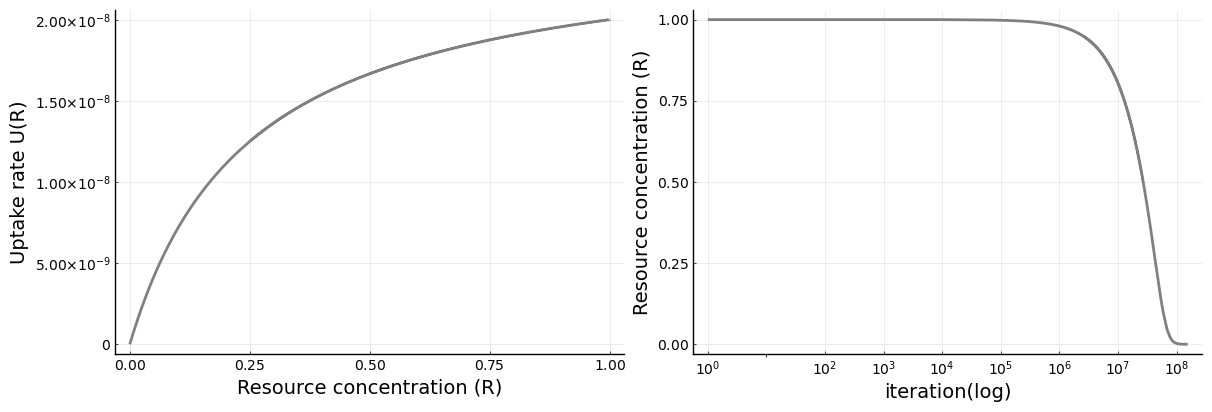

In [8]:

l = @layout [grid(1,2) ]
#blank = plot(foreground_color_subplot=:white)
p1=plot(is,rs,label=false,ylabel="Resource concentration (R)",xlabel="iteration(log)",xticks=[1,1e2,1e3,1e4,1e5,1e6,1e7,1e8],xaxis=:log,line=(2,:solid,:gray))
p2=plot(rs,urs,label=false,legend=:bottomright,xlabel="Resource concentration (R)",ylabel="Uptake rate U(R)",line=(2,:solid,:gray))
tp2=plot(p2,p1, layout=l,size=(1200,400))
figname=pathFigures*"SI_Fig-2.pdf"
savefig(tp2,figname);


## SI Figure 3

### 3A

In [37]:
starting_variation=false
iniCells=3
this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
for b in this_bst
    b.ATP=0.5
    b.plasmids[1]=19
    b.plasmids[2]=1
    
end
this_bst[3].plasmids[1]=30
this_bst[3].plasmids[2]=1

R0=0.75
aA=0.
T=60*1
time_mins=collect(1:T)
lid=length(this_bst)
bact_times=Dict()
bact_atps=Dict()
bact_plasm=Dict()

ti=0
for b in this_bst
    haskey(bact_times,b.id) ? 0 : (bact_times[b.id]=Int[];bact_atps[b.id]=Float32[];bact_plasm[b.id]=Int[])
    push!(bact_times[b.id],ti)
    push!(bact_atps[b.id],b.ATP)
    push!(bact_plasm[b.id],b.plasmids[2])
end

println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
    for b in this_bst
        haskey(bact_times,b.id) ? 0 : (bact_times[b.id]=Int[];bact_atps[b.id]=Float32[];bact_plasm[b.id]=Int[])
        push!(bact_times[b.id],ti)
        push!(bact_atps[b.id],b.ATP)
        push!(bact_plasm[b.id],b.plasmids[2])
    end
end






Time	Total	Resource
0	3	0.75
0.5	6	0.7499983312504589
1.0	10	0.749994581254877


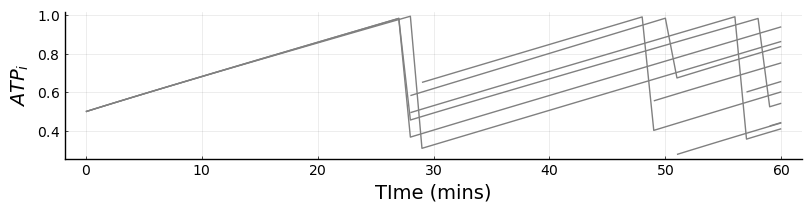

In [43]:
p1=plot(size=(800,200))
for b in this_bst
    plot!(p1,bact_times[b.id],bact_atps[b.id],label=:false,color=:gray)
end
strl=LaTeXString(L"ATP_i")
plot!(p1,xlab="TIme (mins)",ylab=strl)
figname=pathFigures*"SI_Fig-3A.pdf"
savefig(p1,figname);




### 3B

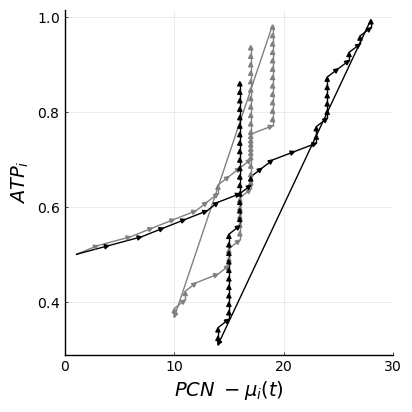

In [44]:
p2=plot(size=(400,400))
# for b in this_bst[1:2]
#     plot!(p2,bact_plasm[b.id],bact_atps[b.id],label=:false)
# end

this_track_x=bact_plasm[1]
this_track_y=bact_atps[1]

for i in collect(1:length(this_track_x)-1)
    tx0=this_track_x[i]
    ty0=this_track_y[i]
    tx1=this_track_x[i+1]
    ty1=this_track_y[i+1]
    plot!(p2,[tx0,tx1],[ty0,ty1],label=:false,arrow=true,color=:gray)
end

this_track_x=bact_plasm[3]
this_track_y=bact_atps[3]

for i in collect(1:length(this_track_x)-1)
    tx0=this_track_x[i]
    ty0=this_track_y[i]
    tx1=this_track_x[i+1]
    ty1=this_track_y[i+1]
    plot!(p2,[tx0,tx1],[ty0,ty1],label=:false,arrow=:true,color=:black)
end

#plot!(p2,,bact_atps[1],label=:false,arrow=true)
strl=LaTeXString(L"ATP_i")
strl2=LaTeXString(L"PCN\ - \mu_i(t)")
plot!(p2,xlab=strl2,ylab=strl,xlim=(0,30))

figname=pathFigures*"SI_Fig-3B.pdf"
savefig(p2,figname);




### 3C

In [40]:
rs=collect(0:.001:1)
pcns=collect(0:1:40)
pCost2=0.003
mtx_atp=zeros(length(rs),length(pcns))
for (ri,r) in enumerate(rs)
    uR=(Vmax*r)/(Km+r)
    #println(uR)
    for (pi,pcn) in enumerate(pcns)
        modC=1-(pCost2*pcn)
        c=cE*modC  #Efficiency
        #print(c,",")
        ATPi=c*uR           
        mtx_atp[ri,pi]=ATPi   
    end
    #println()
end





sys:1: UserWarning: The following kwargs were not used by contour: 'label'


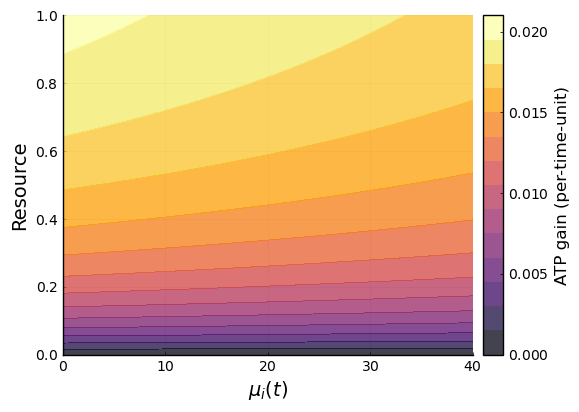

In [46]:
p=plot(size=(600,400))

cmap=:inferno
#cmap=cgrad([colorant"white",colorant"red"])
#heatmap!(p,pcns,rs,mtx_atp,colorbar=true, color=cmap)# clim=(-0.000000,0.02001)
contour!(p,pcns,rs,mtx_atp,colorbar=true, color=cmap,fill=true,lw=0,alpha=.75,
    # clim=(-0.000000,0.02001)
        )
plot!(p,cbartitle="ATP gain (per-time-unit)")#,legend=:bottomright)
    
strl=LaTeXString(L"\mu_i(t)")
#xticks=newticks,
plot!(p,xlabel=strl)
plot!(p,ylabel="Resource")
figname=pathFigures*"SI_Fig-3C.pdf"
savefig(p,figname);


## SI Figure 4


In [47]:
R0=1.0
aA=0.
T=60*12
time_mins=collect(1:T)
iniCells=1
starting_variation=true
@everywhere p_Ndist=Normal(mu,mu*cv)
rs=Float16[]
this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    push!(rs,R0)
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
end

n_bacteriaVF=get_Nbacteria_Time(this_bst,time_mins)



Time	Total	Resource
0	1	1.0
0.5	1	0.9999994200000325
1.0	3	0.9999981200003497
1.5	6	0.9999955000020161
2.0	14	0.9999895000110042
2.5	31	0.9999768400535931
3.0	65	0.9999499602503061
3.5	146	0.999892301159772
4.0	303	0.9997670254280923
4.5	649	0.9994971252957712
5.0	1389	0.9989159975889386
5.5	3014	0.997666845204655
6.0	6498	0.9949848835701068
6.5	13895	0.9892290053955268
7.0	29899	0.9768962350244514
7.5	63895	0.9505484390466146
8.0	135932	0.8948934337639309
8.5	284508	0.7800220098117021
9.0	571923	0.5572899000505639
9.5	1015714	0.2130291776640823
10.0	1270831	0.013946355519290347
10.5	1288410	0.00031298891646000185
11.0	1288791	6.562253679843385e-6
11.5	1288796	1.3737731687095626e-7
12.0	1288796	9.332543022543902e-8


720-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6
 1.288796e6

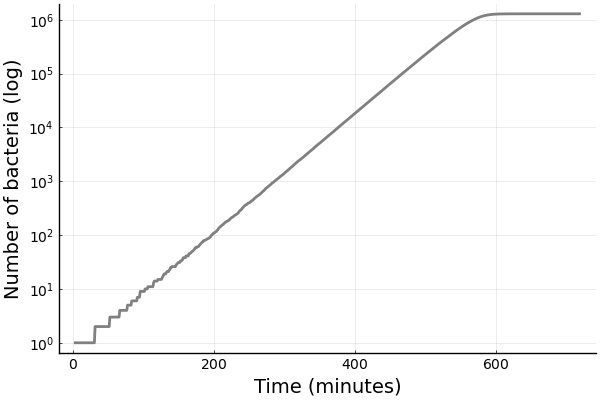

In [48]:
p00=plot(size=(600,400))

maxBac=n_bacteriaVF[end]*1.02
plot!(p00,n_bacteriaVF,label=false,xlabel="Time (minutes)",ylabel="Number of bacteria (log)",line=(2,:solid,:gray),
    )
plot!(p00,
    #yaxis=(formatter=y->string(round( y / 10^6,digits=2))),
    #ylim=(-5e4,maxBac)
    yaxis=:log,
        
    )
    #annotate!([(-10, maxBac * 0.95, Plots.text(L"\times10^{6}", 11, :black, :center))])
    


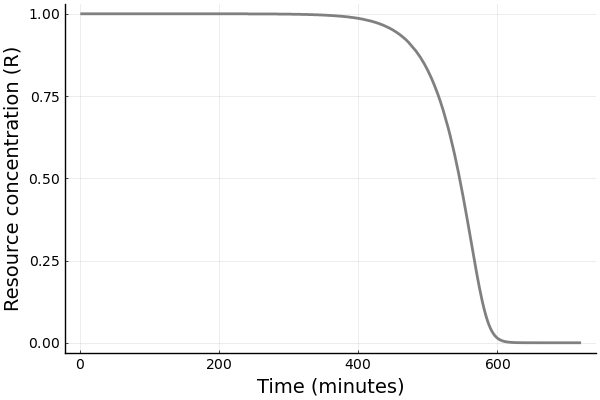

In [61]:
p1=plot(size=(600,400))
T=60*12
time_mins=collect(1:T)
p1=plot(p1,time_mins,rs,label=false,ylabel="Resource concentration (R)",xlabel="Time (minutes)",line=(2,:solid,:gray))


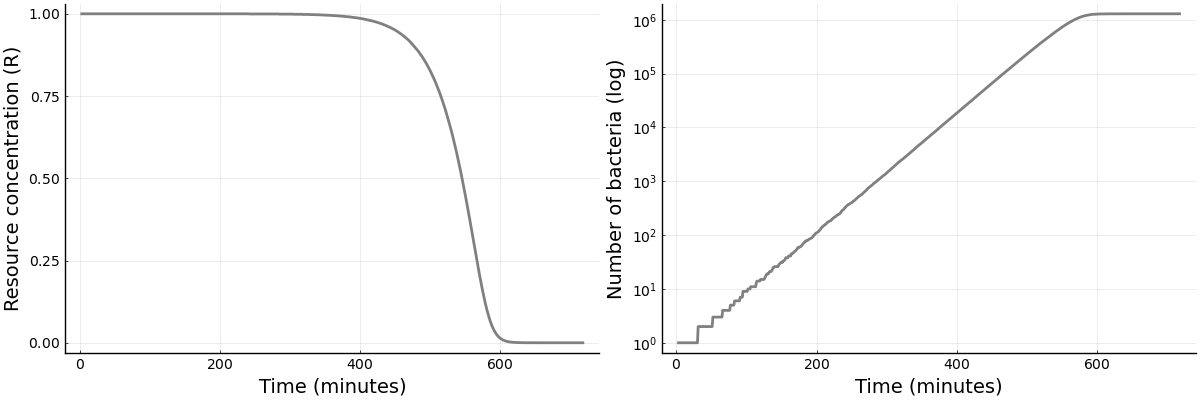

In [50]:
l = @layout [grid(1,2) ]
tp3=plot(p1,p00, layout=l,size=(1200,400))
#figname=pathFigures*"SI_Fig-4.pdf"
#savefig(tp3,figname);
display(tp3)
closeall()

In [51]:
R0=1.0
aA=0.
T=60*6
time_mins6=collect(1:T)
iniCells=1000
starting_variation=true
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);

for b in this_bst
    b.ATP=b.ATP*0.5
end

lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins6
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
end

n_bacteriaV6=get_Nbacteria_Time(this_bst,time_mins6)


Time	Total	Resource
0	1000	1.0
0.5	1004	0.9994199936525886
1.0	2323	0.9984213094858227
1.5	5146	0.9962674366719546
2.0	11188	0.9916303044979214
2.5	24130	0.9816908971655416
3.0	51550	0.9604364821369811
3.5	109697	0.9153524491557298
4.0	231401	0.8214209059976547
4.5	472409	0.6347405393845305
5.0	883667	0.31570978936403343
5.5	1242020	0.037096214514821306
6.0	1288303	0.0009338861584849268


360-element Vector{Float64}:
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
    ⋮
    1.285131e6
    1.285678e6
    1.286089e6
    1.286511e6
    1.286903e6
    1.287226e6
    1.287498e6
    1.287738e6
    1.287935e6
    1.288132e6
    1.288303e6
    1.288434e6

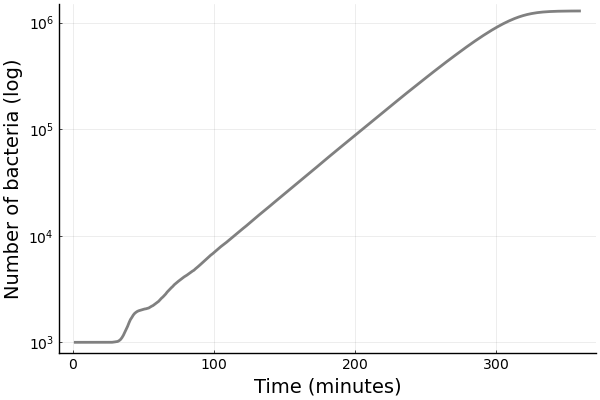

In [52]:
p2=plot(size=(600,400))
plot!(p2,n_bacteriaV6,label=false,xlabel="Time (minutes)",ylabel="Number of bacteria (log)",line=(2,:solid,:gray),
yaxis=:log, ylims=(800,1.5e6), yticks=[1e3,1e4,1e5,1e6]
    #xaxis=:log
)


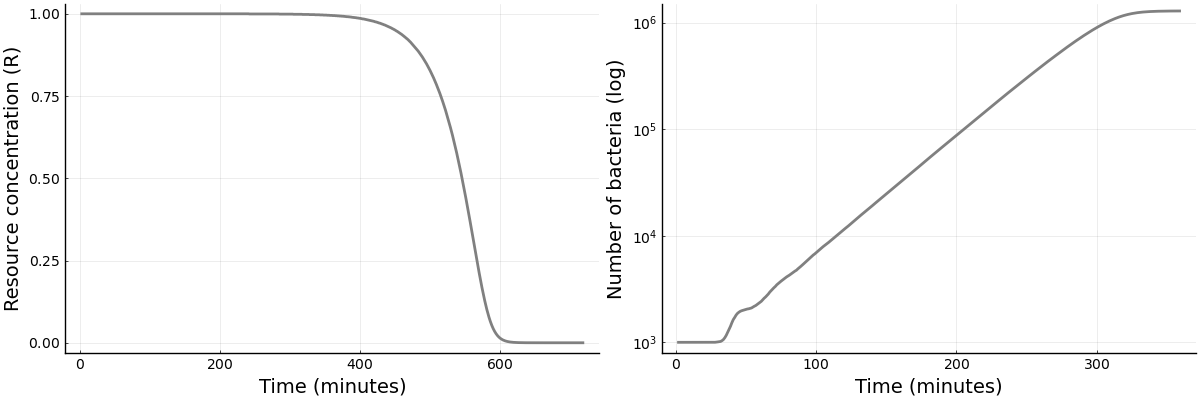

In [64]:
l = @layout [grid(1,2) ]
tp4=plot(p1,p2, layout=l,size=(1200,400))
figname=pathFigures*"SI_Fig-4.pdf"
savefig(tp4,figname);
display(tp4)
closeall()

## SI Figure 5

### 5A

In [53]:
starting_variation=false
iniCells=1
mu=40.
p_Ndist=Normal(mu,mu*0.001)
#p_Ndist=Normal(mu,mu*cv)
aA=0.
T=60*3
time_mins=collect(1:T)

@everywhere rep_delay=1

R0=1.0

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
bact_times=Dict()
bact_plasm=Dict()

println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_nodaughters(ti, this_bst, R0, aA,antibiotic_action,lid)
    for b in this_bst
        haskey(bact_times,b.id) ? 0 : (bact_times[b.id]=Int[];bact_plasm[b.id]=Int[])
        push!(bact_times[b.id],ti)
        push!(bact_plasm[b.id],b.plasmids[2])
    end
end

this_bst1=deepcopy(this_bst)
bact_times1=deepcopy(bact_times)
bact_plasm1=deepcopy(bact_plasm)

@everywhere rep_delay=3

R0=1.0
this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
bact_times=Dict()
bact_plasm=Dict()

println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_nodaughters(ti, this_bst, R0, aA,antibiotic_action,lid)
    for b in this_bst
        haskey(bact_times,b.id) ? 0 : (bact_times[b.id]=Int[];bact_plasm[b.id]=Int[])
        push!(bact_times[b.id],ti)
        push!(bact_plasm[b.id],b.plasmids[2])
    end
end

this_bst3=deepcopy(this_bst)
bact_times3=deepcopy(bact_times)
bact_plasm3=deepcopy(bact_plasm)

@everywhere rep_delay=5

R0=1.0

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
bact_times=Dict()
bact_plasm=Dict()

println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_nodaughters(ti, this_bst, R0, aA,antibiotic_action,lid)
    for b in this_bst
        haskey(bact_times,b.id) ? 0 : (bact_times[b.id]=Int[];bact_plasm[b.id]=Int[])
        push!(bact_times[b.id],ti)
        push!(bact_plasm[b.id],b.plasmids[2])
    end
end

this_bst5=deepcopy(this_bst)
bact_times5=deepcopy(bact_times)
bact_plasm5=deepcopy(bact_plasm)
;


Time	Total	Resource
0	1	1.0
0.5	1	0.9999994200000325
1.0	1	0.999998820000137
1.5	1	0.9999982200003134
2.0	1	0.9999976200005617
2.5	1	0.9999970200008822
3.0	1	0.9999964200012745
Time	Total	Resource
0	1	1.0
0.5	1	0.9999994200000325
1.0	1	0.999998820000137
1.5	1	0.9999982200003134
2.0	1	0.9999976200005617
2.5	1	0.9999970200008822
3.0	1	0.9999964200012745
Time	Total	Resource
0	1	1.0
0.5	1	0.9999994200000325
1.0	1	0.999998820000137
1.5	1	0.9999982200003134
2.0	1	0.9999976200005617
2.5	1	0.9999970200008822
3.0	1	0.9999964200012745


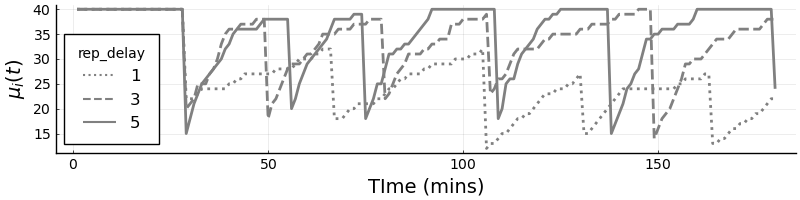

In [65]:
p5A=plot(size=(800,200))


plot!(p5A,bact_times1[1],bact_plasm1[1],label=1,lw=2,ls=:dot,c=:"gray")
plot!(p5A,bact_times3[1],bact_plasm3[1],label=3,lw=2,ls=:dash,c=:"gray")
plot!(p5A,bact_times5[1],bact_plasm5[1],label=5,lw=2,ls=:solid,c=:"gray")
plot!(leg_title="rep_delay",legend_position=:bottomleft,legend_title_font_pointsize=10,legend_font_pointsize=12)
#ylims!(p1,-1,22)
strl=LaTeXString(L"\mu_i(t)")
plot!(p5A,xlab="TIme (mins)",ylab=strl)

figname=pathFigures*"SI_Fig-5A.pdf"
savefig(p5A,figname);
display(p5A)
closeall()


### 5B

In [67]:

aA=0.
T=60*2
time_mins=collect(1:T)
iniCells=1000
starting_variation=true
mu=19.0
@everywhere p_Ndist=Normal(mu,mu*cv)

rep_delays=[1,3,5,10,50]
pdist_vec=[]

for dummy in rep_delays
global rep_delay=dummy
    println("Using rep_dlay=$(rep_delay)")
    R0=1.0
    this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
    lid=length(this_bst)
    println("Time\tTotal\tResource")
    for ti in time_mins
        if (ti%30==0)|(ti==1)
            ti==1 ? x=0 : x=ti/60
            print(x,"\t",length(this_bst),"\t",R0,"\r")
            flush(stdout)
        end

        R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
    end
    pdist=get_timePlamids(time_mins,this_bst)
    push!(pdist_vec,pdist)
    println()
end



Using rep_dlay=1
Time	Total	Resource
2.0	16546	0.987954506943983
Using rep_dlay=3
Time	Total	Resource
2.0	16289	0.9880080566584377
Using rep_dlay=5
Time	Total	Resource
2.0	16183	0.9880848508448821
Using rep_dlay=10
Time	Total	Resource
2.0	15746	0.9883163978985845
Using rep_dlay=50
Time	Total	Resource
2.0	15799	0.9882769912284333


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


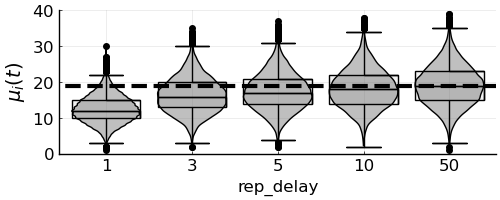

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [68]:
#####################################
bin_edges=collect(0:1:40)
norm=false
xs=collect(1:length(pdist_vec))

p5B=plot(size=(500,200))
for i in xs
    Ntime_Pcounts_bins=binarize_timePcounts(pdist_vec[i],time_mins,bin_edges,norm)
    thisd=Ntime_Pcounts_bins[:,end]
    all=[]
    for (i,x) in enumerate(bin_edges)
        #print("$i-$x-$(thisd[i]), ")
       if(thisd[i]!=0)
           xx=repeat([x],Int(thisd[i]))
            all=[all;xx]
        end
    end
    violin!([i],all,label=false,fill=(.5,:gray))
    boxplot!([i],all,labels=false,color = :black,fillalpha=0.05,side=:right)
end
hline!([19],label=false,line=(3, :dash, :black))
strl=LaTeXString(L"\mu_i(t)")
plot!(xticks=(xs,rep_delays),xlabel="rep_delay",ylabel=strl,tickfontsize = 12,xguidefontsize=12)
#title!("End-point plasmid distrubutions\n at exponential phase")
p5B

figname=pathFigures*"SI_Fig-5B.pdf"
savefig(p5B,figname);
display(p5B)
closeall()


## SI Figure 6

In [69]:
#%%julia

bin_edges=collect(0:1:30)

T=60*8
aA=0.
time_mins=collect(1:T)
starting_variation=true
iniCells=1000
aA=0.
R0=1.

degAA=1e-20
kNoise_dist=Normal(0.,.05)
pulse_start=3.5
pulse_end=5

iniCells=1000
bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
sim_file2=pathData*"AntibioticPulse_sim-$(T)min_IniCells-$(iniCells).bacsim"

reDo_sim=true
reDo_sim=false
if reDo_sim
    #this_bst2=Bacteria[]
    this_bst2=deepcopy(bst)
    lid=length(bst)

    println("Time\tTotal\tResource         .\tN alive")

    for ti in time_mins

        ti==60*pulse_start ? (aA=pMIC*1;println("Introducing antibiotic")) : 0
        ti==60*pulse_end ? (aA=0.;println("Removing antibiotic")) : 0

        if ti%30==0
            tparam=0
            batp=0
            tdivs=[]
            for b in this_bst2
                b.isDead==false ? tparam+=1 : 0
                b.id==1 ? (batp=b.ATP;tdivs=b.divisions) : 0
            end
            println(ti/60,"\t",length(this_bst2),"\t",R0,"\t",tparam,"\t",aA,"\t",batp)#," ",tdivs./60)
            flush(stdout)
        end

        R0,aA,lid=simulate_nodaughters(ti, this_bst2, R0, aA,antibiotic_action,lid)

    end
    serialize(sim_file2, this_bst2);

else
    this_bst2=deserialize(sim_file2);
    println("Loaded saved simulation")
end

survivors2=get_Pseries_survivours_indexs(this_bst2)
killed2=get_Pseries_killed_indexs(this_bst2,60*(pulse_start+.5),60*pulse_end)

println("Got $(length(survivors2)) founder survivors")
println("Got $(length(killed2)) founders killed")

Loaded saved simulation
Got 44 founder survivors
Got 268 founders killed


Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-6.pdf ..


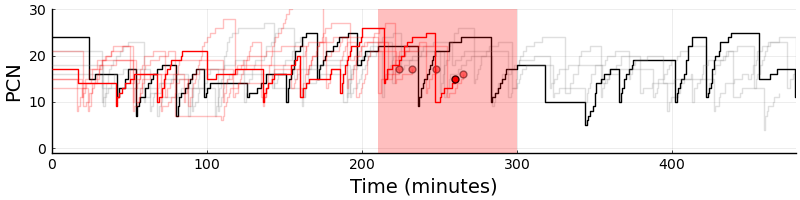

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [70]:
#%%julia

pp=plot(size=(800,200))
for (i,is) in enumerate(survivors2[1:4])
    i==3 ? (talpha=1;tcolor="black") : (talpha=.25;tcolor="gray")
    t_surv2,p_surv2=get_thisBac_Pseries(this_bst2,is)
    plot!(pp,t_surv2,p_surv2,linetype=:step,legend=false,color=tcolor,alpha=talpha)
end


cc=0
killed3=deepcopy(killed2)
shuffle!(killed3)
for (i,this_killed) in enumerate(killed3)

    i==5 ? continue : 0
    t_dead2,p_dead2=get_thisBac_Pseries(this_bst2,this_killed)
    p_dead2[end]<mu ?  (global cc+=1) : continue

    plot!(pp,t_dead2,p_dead2,linetype=:step,legend=false,color="red",alpha=.25)
    scatter!(pp,[t_dead2[end]],[p_dead2[end]],color="red",m=5,alpha=.5)

    cc >=4 ? break : 0
end

t_dead2,p_dead2=get_thisBac_Pseries(this_bst2,killed2[5])
plot!(pp,t_dead2,p_dead2,linetype=:step,legend=false,color="red")
scatter!(pp,[t_dead2[end]],[p_dead2[end]],color="red",m=5)

vspan!(pp,[pulse_start,pulse_end].*60,color="red",alpha=.25)
plot!(pp,xlim=(0,time_mins[end]),ylim=(-1,bin_edges[end]),xlabel="Time (minutes)",ylabel="PCN")
#pp=plt.gcf()

figname=pathFigures*"SI_Fig-6.pdf"
println("Saving figure $figname ..")
savefig(pp,figname)
display(pp)
closeall()

## SI Figure 7

In [4]:
T=60*6
time_mins=collect(1:T)

iniCells=1000

cv=0.35
mu=19
p_Ndist=Normal(mu,mu*cv)
kNoise_dist=Normal(0.,.01)

@everywhere rep_delay=3
antibiotic_action=.75
@everywhere antibiotic_deg=false

sim_ICs=[0;collect(.25:.25:0.5);collect(0.5:.05:.9);collect(.925:.025:1.2)]
sim_ICs=[0;collect(.25:.25:0.5);collect(0.55:.05:.9);collect(.91:.01:1.);collect(1.025:.025:1.25)]
#sim_ICs=[collect(0.75:.05:.9);collect(.91:.01:1.);collect(1.025:.025:1.2)]
#sim_ICs=[0.9,0.95,1]
println(sim_ICs)


sim_fileDR=pathData*"DoseResponse.bacsim"

bin_edges=collect(0:1:41)


reDo_sim=true
#reDo_sim=false
if reDo_sim
    ic_pop_sizes=[]
    ic_pop_sizes_alive=[]
    ic_pcounts=[]
    ic_pcounts_bins=[]
    ic_means=[]
    for current_IC in sim_ICs
        this_bst=Bacteria[]
        this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
        lid=length(this_bst)
        println("\n\nSim using IC-$(current_IC)")
        println("Time\tTotal\tResource         .\tN alive")


        R0=1.
        aA=0.
        lid=length(this_bst)
        aA=pMIC*current_IC
        for ti in time_mins
            if (ti%30==0)|(ti==1)
                tparam=0
                for b in this_bst
                    b.isDead==false ? tparam+=1 : 0
                end
                println(ti/60,"\t",length(this_bst),"\t",R0,"\t",tparam,"\t",aA)
                flush(stdout)
            end
            R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)

        end
        tparam=0
        for b in this_bst
            b.isDead==false ? tparam+=1 : 0
        end
        push!(ic_pop_sizes,length(this_bst))
        push!(ic_pop_sizes_alive,tparam)
        time_Pcounts=get_timePlamids(time_mins,this_bst)
        push!(ic_pcounts,time_Pcounts)
        norm=true
        Ntime_Pcounts_bins=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
        push!(ic_pcounts_bins,Ntime_Pcounts_bins)
        pmean=get_mean_from_bincounts(Ntime_Pcounts_bins,bin_edges)
        push!(ic_means,pmean[end])
    end
    dose_response_data=[ic_pop_sizes,ic_pop_sizes_alive,ic_pcounts,ic_pcounts_bins,ic_means]
    serialize(sim_fileDR, dose_response_data);
else
    dose_response_data=deserialize(sim_fileDR);
    ic_pop_sizes,ic_pop_sizes_alive,ic_pcounts,ic_pcounts_bins,ic_means=dose_response_data
    println("Loaded saved simulation")
end
ic_pop_sizes_alive

[0.0, 0.25, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 1.225, 1.25]


Sim using IC-0.0
Time	Total	Resource         .	N alive
0.016666666666666666	1000	1.0	1000	0.0
0.5	1647	0.9993280851658424	1647	0.0
1.0	3525	0.9978780509005202	3525	0.0
1.5	7505	0.994772442286647	7505	0.0
2.0	16184	0.9881057006047003	16184	0.0
2.5	34658	0.9738224661563518	34658	0.0
3.0	73950	0.9434042900324529	73950	0.0
3.5	156751	0.8792895160846141	156751	0.0
4.0	326415	0.7478742175578805	326415	0.0
4.5	648226	0.49886256047920446	648226	0.0
5.0	1097685	0.14999349824446448	1097685	0.0
5.5	1280624	0.006878067588803544	1280624	0.0
6.0	1289373	0.0001486727685615984	1289373	0.0


Sim using IC-0.25
Time	Total	Resource         .	N alive
0.016666666666666666	1000	1.0	1000	2048.5
0.5	1638	0.999341643361061	1624	2048.3818031162605
1.0	3470	0.9979261106931088	3450	2048.1486490856023
1.5	7360	0.9949011686691056	7332

31-element Vector{Any}:
 1289395
 1284755
 1176429
 1085889
  815085
  450081
  197278
   64781
   18714
    5124
    1062
     859
     870
       ⋮
      46
      25
      20
       5
       7
       0
       3
       0
       0
       0
       0
       0

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-7.pdf ..


┌ Warning: Invalid negative or zero value 0.0 found at series index 25 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/B5j7d/src/utils.jl:106


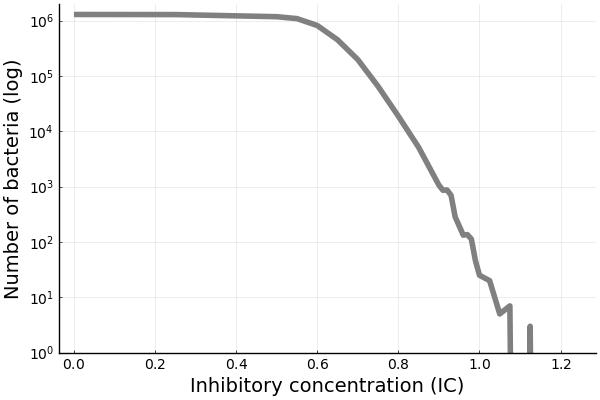

┌ Warning: Invalid negative or zero value 0.0 found at series index 25 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/B5j7d/src/utils.jl:106


In [6]:
p7=plot(size=(600,400))

# plot!(p7,sim_ICs,ic_pop_sizes_alive,label=false,line=(4,:solid,:gray),
#     xlabel="IC",    ylabel="Number of bacteria",
#     yaxis=(formatter=y->string(round( y / 10^6,digits=2))),
#     #formatter = :scientific
#     top_margin=25px
#     )
# annotate!(p7,[(-.015, 1.35e6 , Plots.text(L"\times10^{6}", 11, :black, :center))],ylims=[0,1.3e6])


plot!(p7,sim_ICs,ic_pop_sizes_alive,label=false,line=(4,:solid,:gray),
    xlabel="Inhibitory concentration (IC)",    ylabel="Number of bacteria (log)",
    #yaxis=(formatter=y->string(round( y / 10^6,digits=2))),
    ylims=(1,2e6),
    yticks=[1e0,1e1,1e2,1e3,1e4,1e5,1e6],
    yaxis=:log
    #formatter = :scientific
   # top_margin=25px
    )


figname=pathFigures*"SI_Fig-7.pdf"
println("Saving figure $figname ..")
savefig(p7,figname)
display(p7)
closeall()

## SI Figure 8


### 8A

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-8A.pdf ..


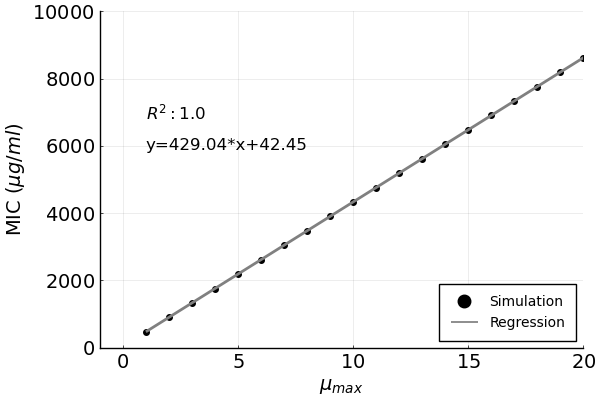

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [8]:
pcns = 1:100  # PCN values from 1 to 100
mics = [getMIC(pcn) for pcn in pcns]  # Calculate MIC for each PCN

df = DataFrame(P=pcns, M=mics)

ols = lm(@formula(M ~ P), df)
b, m = coef(ols)
r = r2(ols)
f(x) = m * x + b
ys = f.(pcns)

p8A = plot(size=(600,400), tickfont=font(14))
scatter!(pcns, mics, label="Simulation", color="black")
plot!(pcns, ys, label="Regression", legend=:bottomright, line=(2, :solid, :gray))
strl = LaTeXString(L"\mu_{max}")
xlabel!(strl)

strl1 = LaTeXString(L"(\mu g/ml)")
strl0 = "MIC "
strl = strl0 * strl1
ylabel!(strl)

rl = round(r, digits=4)
strl = LaTeXString(L"R^2: " * "$rl")
ml = round(m, digits=2)
bl = round(b, digits=2)

strl2 = "y=$ml*x+$bl"
annotate!(1, 7000, text(strl, :black, :left, 12))
annotate!(1, 6000, text(strl2, :black, :left, 12))
xlims!(-1, 20)
ylims!(0, 1e4)




figname=pathFigures*"SI_Fig-8A.pdf"
println("Saving figure $figname ..")
savefig(p8A,figname)
display(p8A)
closeall()

### 8B

In [11]:


# Assuming test_survival and other necessary functions are defined earlier
@everywhere kNoise_dist=Normal(0.,0.01)

# Parameters
ic = 1.0
mu=19.0
mu_max_range = 0:40
cov_range = [0.01, 0.10, 1.,  10.0, 50.]  # Example CoV values, adjust as needed
iniCells = 10000
results = []

for cov in cov_range
    alive_counts = [test_survival2(tmu, tmu * cov, ic) / iniCells for tmu in mu_max_range]
    push!(results, (cov, alive_counts))
end

print(results[1][2])





[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017, 0.5072, 0.9975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

5Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-8B.pdf ..


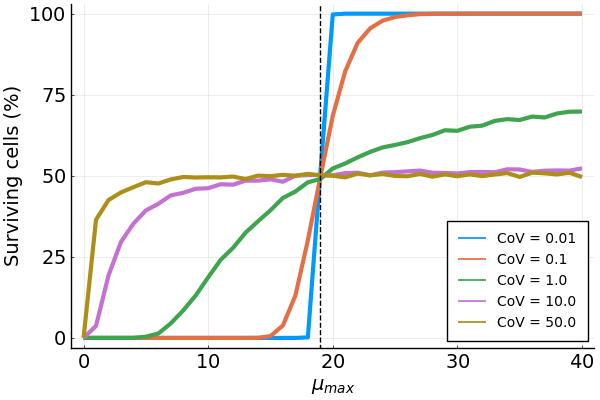

In [12]:

# Plotting
p8B = plot(size=(600,400), legend=:bottomright, tickfont=font(14))
i=1
nc=length(results)
print(nc)
for (cov, counts) in results
    
    plot!(mu_max_range, counts*100, label="CoV = $cov", markersize=4, lw=3)
    #plot!(mu_max_range, counts*100, label="CoV = $cov", markersize=4, lw=3,c=:"gray",alpha=i/nc)
    #plot!(mu_max_range, counts*100, label="CoV = $cov", markersize=4, lw=i,c=:"gray",alpha=i/nc)
    i+=1
end


xlabel!(LaTeXString(L"\mu_{max}"), fontsize=18)
ylabel!("Surviving cells (%)", fontsize=18)
xticks!([0,10,20,30,40])
vline!([19],label=false,line=(1, :dash, :black))
xlims!(-1, maximum(mu_max_range) + 1)


figname=pathFigures*"SI_Fig-8B.pdf"
println("Saving figure $figname ..")
savefig(p8B,figname)
display(p8B)
closeall()

In [13]:
# pcns=[0,1,19]
# mics=[4,512,8192]

# df = DataFrame(P=pcns, M=mics)

# ols = lm(@formula(M ~ P ), df)
# #display(ols)
# b,m=coef(ols)
# r=r2(ols)
# f(x)=m*x+b
# ys=f.(pcns)

# p5=plot(size=(500,300))
# scatter!(pcns,mics,label="Data",color="black")
# plot!(pcns,ys,label="Regression",legend = :bottomright,line=(2,:solid,:gray))
# plot!(xlabel="resistance gene copies",ylabel="Ampicillin MIC")
# #x=L"\mu"
# rl=round(r, digits=4)
# strl=LaTeXString(L"R^2: "*"$rl")
# ml=round(m, digits=2)
# bl=round(b, digits=2)

# strl2="y=$ml*x+$bl"
# annotate!(1, 7000, text(strl, :black, :left, 12))
# annotate!(1, 6000,text(strl2, :black, :left, 12))
# xlims!(-1,20)


# figname=pathFigures*"SI_Fig-x.pdf"
# println("Saving figure $figname ..")
# savefig(p5,figname)
# display(p5)
# closeall()

## SI Figure 9

#### The data is comming from the experiment performed to produce Figure 1F

In [149]:
pathData9=pathData*"LB-AMP-LB/"
pathData9

"/home/charly/Lab/Projects/pBGT/GIT/data/sim_data/LB-AMP-LB/"

In [157]:
time_mins=collect(1:T)
iniCells=1000 ############## dilution
starting_variation=true
mu=19
#sim_ICs=[0;collect(.25:.25:.75);collect(.8:.05:.9);collect(.925:.025:1)]
sim_ICs=[0;collect(.25:.25:.75);collect(.8:.05:.9);collect(.925:.025:1)]

cv=0.3
p_Ndist=Normal(mu,mu*cv)
kNoise_dist=Normal(0.,.001)

# @everywhere rep_delay=100
# antibiotic_action=.6


T=60*6
time_mins=collect(1:T)
Ndays=3
bin_edges=[0;collect(10:3:41)]
Ndays_time_mins=collect(1:time_mins[end]*Ndays)
Ndays_time_Pcounts=[]


ic_index=4
current_IC=sim_ICs[ic_index]
println("Plotting ic $(current_IC)")


for day=1:Ndays
    analys_file=pathData9*"Transfers_p-timeSeries-$(T)min_IniCells-$(iniCells)_mu-$(Int(mu))_IC-$(current_IC)_day-$(day).bacsim"
    println("Reading $analys_file ...")
    flush(stdout)
    time_Pcounts=deserialize(analys_file);
    Ndays_time_Pcounts=vcat(Ndays_time_Pcounts,time_Pcounts)


end
norm=false
Ntime_Pcounts_bins=binarize_timePcounts(Ndays_time_Pcounts,Ndays_time_mins,bin_edges,norm)


Plotting ic 0.75
Reading /home/charly/Lab/Projects/pBGT/GIT/data/sim_data/LB-AMP-LB/Transfers_p-timeSeries-360min_IniCells-1000_mu-19_IC-0.75_day-1.bacsim ...
Reading /home/charly/Lab/Projects/pBGT/GIT/data/sim_data/LB-AMP-LB/Transfers_p-timeSeries-360min_IniCells-1000_mu-19_IC-0.75_day-2.bacsim ...
Reading /home/charly/Lab/Projects/pBGT/GIT/data/sim_data/LB-AMP-LB/Transfers_p-timeSeries-360min_IniCells-1000_mu-19_IC-0.75_day-3.bacsim ...


12×1080 Matrix{Float64}:
   0.0    0.0    0.0    0.0    0.0    0.0  …       0.0       0.0       0.0
  83.0   80.0   80.0   80.0   81.0   81.0      49383.0   50160.0   50429.0
  85.0   86.0   86.0   87.0   87.0   86.0      99898.0  101255.0  102820.0
 185.0  186.0  186.0  187.0  186.0  186.0     167853.0  170350.0  172881.0
 178.0  178.0  178.0  178.0  180.0  180.0     202287.0  205544.0  208816.0
 190.0  191.0  191.0  191.0  190.0  192.0  …  189502.0  192552.0  195398.0
 141.0  141.0  141.0  141.0  141.0  141.0     137733.0  139784.0  141983.0
  90.0   90.0   90.0   90.0   91.0   92.0      76730.0   77922.0   79317.0
  37.0   37.0   37.0   37.0   37.0   37.0      32839.0   33388.0   33847.0
   9.0    9.0    9.0    9.0    9.0    9.0      10369.0   10548.0   10734.0
   5.0    5.0    5.0    5.0    5.0    5.0  …    2569.0    2613.0    2652.0
   0.0    0.0    0.0    0.0    0.0    0.0        474.0     488.0     502.0

### 9A


Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation//SI_Fig-9A.pdf ..


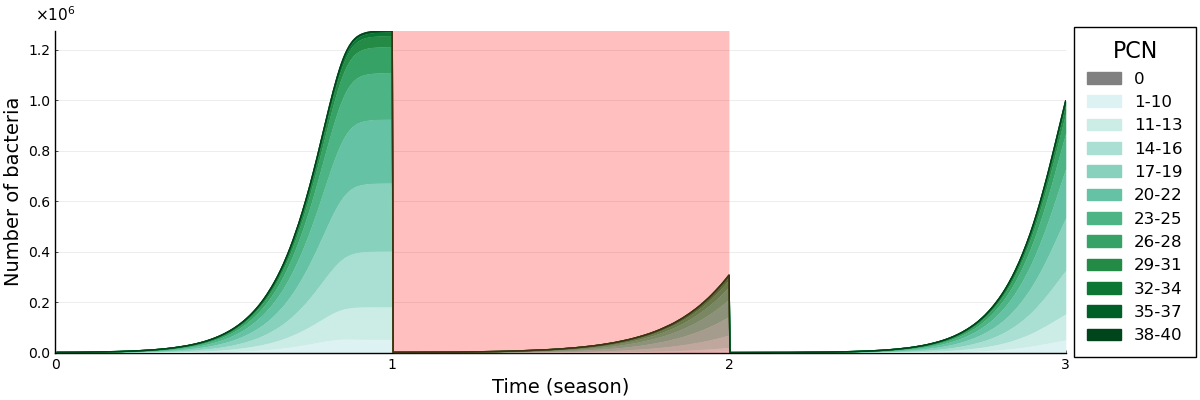

In [158]:
function plotStreambinned_nolog(Ntime_Pcounts_bins0,Ndays_time_mins0,time_mins0,Ndays0,bin_edges0)
    ncolors=length(Ntime_Pcounts_bins0[:,1])

    tc0=palette(:BuGn,ncolors+1 )# )
    graycolor=palette(:grays,3)[2]
    tcp=[c for c in tc0[2:end]]
    tcp[1]=graycolor


    bin_edgesl=["0"]
    for (i,x) in enumerate(bin_edges0[2:end])
        nbs="$(string(bin_edges0[i]+1))-$(string(bin_edges0[i+1]))"
        push!(bin_edgesl,nbs)
    end
    bin_edgesl=reshape(bin_edgesl,1,length(bin_edgesl))


    newtickslabels=collect(0:Ndays0)
    newticks=newtickslabels*time_mins0[end]
    totals=[sum(Ntime_Pcounts_bins0[:,t]) for t in Ndays_time_mins0]
    maxBac=maximum(totals)
    p=plot(size=(1200,400))

    p=areaplot!(p,Ndays_time_mins0,transpose(Ntime_Pcounts_bins0),label=bin_edgesl,color_palette=tcp)

    plot!(p,xticks=(newticks,newtickslabels),xlabel="Time (season)",xlim=(0,Ndays_time_mins0[end]))
    plot!(p,ylim=(-1,maxBac),ylabel="Number of bacteria",
    yaxis=(formatter=y->string(round( y / 10^6,digits=2))),
    #formatter = :scientific
    top_margin=20px

    )
    annotate!([(0, maxBac * 1.05, Plots.text(L"\times10^{6}", 11, :black, :center))])
    plot!(p,legendtitle="PCN",legend=:outerright,legendfontsize=12,legendtitlefontsize=16)
    return p
end





tp9A=plotStreambinned_nolog(Ntime_Pcounts_bins,Ndays_time_mins,time_mins,Ndays,bin_edges)
vspan!(tp9A,[360,360+360],color="red",alpha=.25,labels=false)

figname=pathFigures*"/SI_Fig-9A.pdf"
println("Saving figure $figname ..")
#savefig(tp9A,figname);
display(tp9A)

closeall()


### 9B

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-9B.pdf ..


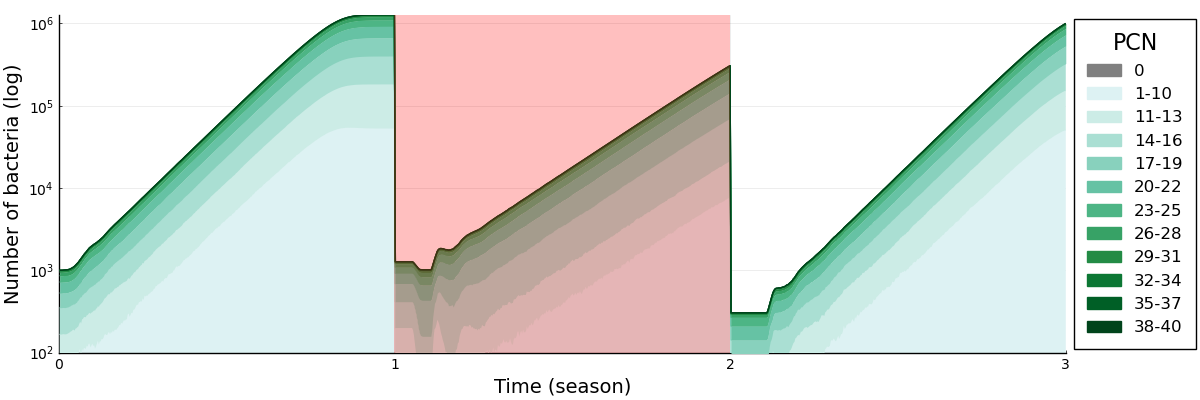

In [162]:


tp9B=plotStreambinned(Ntime_Pcounts_bins,Ndays_time_mins,time_mins,Ndays,bin_edges)
vspan!(tp9B,[360,360+360],color="red",alpha=.25,labels=false)
plot!(tp9B,yaxis=:log)



figname=pathFigures*"SI_Fig-9B.pdf"
println("Saving figure $figname ..")
savefig(tp9B,figname);
display(tp9B)

closeall()


### 9C

[0, 120, 240, 360, 480, 600, 720, 840, 960, 1080]Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-9C.pdf ..


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


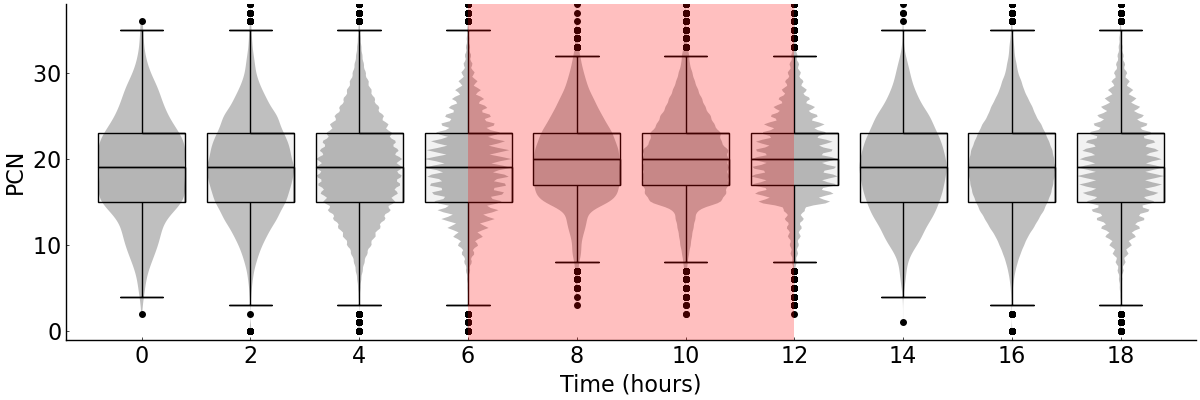

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [163]:

Ndays_time_Pcounts
n_hours=2
this_plot_time=collect(0:60*n_hours:60*6*3+1)
print(this_plot_time)
p_dists=[]
t_dists=[]
for (t,ti) in enumerate(this_plot_time)
    ti==0 ? ti=1 : 0
    thisDict0=Ndays_time_Pcounts[ti]
    this_dist=[]
    for (pcn,timespcn) in sort(collect(thisDict0))
        #println(pcn,"-",timespcn)
        #push!(this_dist,repeat([pcn],timespcn))
        this_dist=[this_dist;repeat([pcn],timespcn)]
    end
    this_t_dist=repeat([t],length(this_dist))
    #println(length(this_t_dist)," ",length(this_dist))
    push!(p_dists,this_dist)
    push!(t_dists,this_t_dist)

end


tp9C=plot(size=(1200,400))
violin!(tp9C,t_dists,p_dists,labels=false,line=0,fill=(.5,:gray),grid = false ,showmeans=true)#,side=:right)
boxplot!(tp9C,t_dists,p_dists,labels=false,color = :black,fillalpha=0.05,side=:right)
vspan!(tp9C,[4,7],color="red",alpha=.25,labels=false)

newticks=collect(1:length(this_plot_time))
newticks_labels=collect(0:n_hours:6*3)

plot!(tp9C,xticks=(newticks,newticks_labels),xlabel="Time (hours)",tickfontsize = 16,xguidefontsize=16)
plot!(tp9C,ylim=(-1,38),ylabel="PCN",yguidefontsize=16)



figname=pathFigures*"SI_Fig-9C.pdf"
println("Saving figure $figname ..")
savefig(tp9C,figname);
display(tp9C)

closeall()


## SI Figure 10

In [39]:
@everywhere kNoise_dist=Normal(0.,.00001)
mu=19.0
cv=0.3
@everywhere p_Ndist=Normal(mu,mu*cv)
@everywhere rep_delay=10

ic=1.0
T=60*6
time_mins=collect(1:T)
iniCells=10000
starting_variation=true
@everywhere p_Ndist=Normal(mu,mu*cv)
pMIC=getMIC(mu)

antibiotic_actions=[0.7,0.8,0.9,0.95,1.0]
#antibiotic_actions=[0.6,0.9]
rep_delays=[1,3,5,10,50]

multiplots=[]
Plots.scalefontsizes(1.0)

println("Time\tTotal\tResource         .\tN alive Antibiotic")
for dummy in rep_delays
global rep_delay=dummy

    pdist_vec=[]

    for antibiotic_action in antibiotic_actions
        println("Using rep_delay=$rep_delay, antibiotic_action=$antibiotic_action")
        R0=1.0
        aA=ic*pMIC
        this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
        lid=length(this_bst)

        for ti in time_mins
            if (ti%30==0)|(ti==1)
                tparam=0
                for b in this_bst
                    b.isDead==false ? tparam+=1 : 0
                end
                print(ti/60,"\t",length(this_bst),"\t",R0,"\t",tparam,"\t",aA,"\r")
                flush(stdout)
            end

            R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
        end
        pdist=get_timePlamids(time_mins,this_bst)
        push!(pdist_vec,pdist)
        println()
    end

    bin_edges=collect(0:1:40)
    norm=false
    xs=collect(1:length(pdist_vec))
    p=plot(size=(600,400))
    for i in xs
        Ntime_Pcounts_bins=binarize_timePcounts(pdist_vec[i],time_mins,bin_edges,norm)
        thisd=Ntime_Pcounts_bins[:,end]
        all=[]
        for (i,x) in enumerate(bin_edges)
            #print("$i-$x-$(thisd[i]), ")
           if(thisd[i]!=0)
               xx=repeat([x],Int(thisd[i]))
                all=[all;xx]
            end
        end
        if(all!=[])
            violin!([i],all,label=false,fill=(.5,:gray))
            boxplot!([i],all,labels=false,color = :black,fillalpha=0.05,side=:right)
        end
    end
    xlims!((xs[1]-0.5,xs[end]+0.5))
    hline!([19],label=false,line=(3, :dash, :black))
    plot!(xticks=(xs,antibiotic_actions),xlabel="antibiotic action",tickfontsize = 12,
        xguidefontsize=12,ylabel="plasmid copy-number")
    title!("End-point plasmid distrubutions - red_delay=$rep_delay",titlefontsize=12)
    ylims!((0,40))
    push!(multiplots,p)
    #display(p)
end

Time	Total	Resource         .	N alive Antibiotic
Using rep_delay=1, antibiotic_action=0.7
6.0	17107	0.9919906294460451	0	8188.152370476475674
Using rep_delay=1, antibiotic_action=0.8
6.0	18539	0.9890198653003118	0	8186.3582415535837965
Using rep_delay=1, antibiotic_action=0.9
6.0	20949	0.9846404758539457	3	8183.723893473426946
Using rep_delay=1, antibiotic_action=0.95
6.0	22509	0.9819030504792718	29	8182.12385282238225
Using rep_delay=1, antibiotic_action=1.0
6.0	24951	0.9780654676552972	97	8179.870518238371425
Using rep_delay=3, antibiotic_action=0.7
6.0	29837	0.9815952548714065	283	8179.81343357340945
Using rep_delay=3, antibiotic_action=0.8
6.0	48210	0.9623407660077085	2818	8166.0424749385675
Using rep_delay=3, antibiotic_action=0.9
6.0	76820	0.9303310081647981	10453	8143.460931549529
Using rep_delay=3, antibiotic_action=0.95
6.0	87758	0.916159932469088	14166	8133.7175105387581
Using rep_delay=3, antibiotic_action=1.0
6.0	96767	0.9033847765361936	18501	8124.9606669772725
Using rep_d

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation//SI_Fig-10.pdf ..


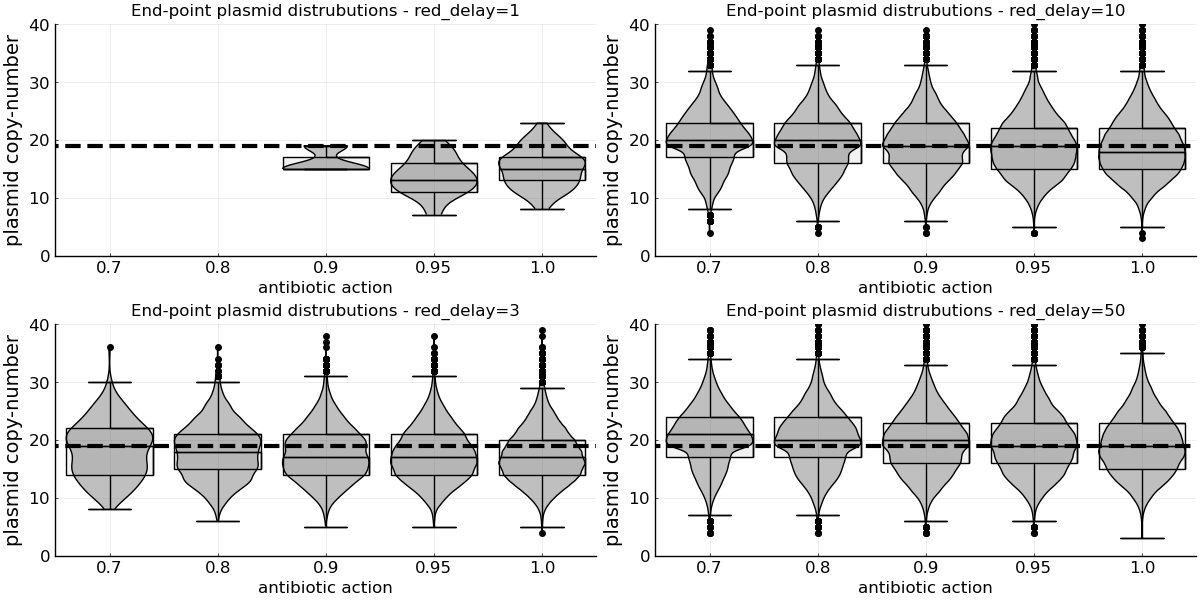

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [40]:
l = @layout [grid(2,2) ]
p10=plot(multiplots[1],multiplots[4],multiplots[2],multiplots[5], layout=l,size=(600*2,300*2))


figname=pathFigures*"/SI_Fig-10.pdf"
println("Saving figure $figname ..")
savefig(p10,figname);
display(p10)

closeall()

## SI Figure 11


### Plasmid dynamics noise without a priori PCN variability
To perform this exploration we will set the variance of the distribution to 0.
To enchance the effect we wil also set the starting variation to false so all cells star with same ATP ammount.

In [5]:
R0=1.0
#R0=0.25
ic=0.0
aA=ic*pMIC

T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=3

mu=19
cv=0
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
end


bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_binsCV=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2000	0.999380038449884
1.0	3513	0.9979575377300176
1.5	7357	0.9949364925884806
2.0	15736	0.9884511212245433
2.5	33667	0.9745662855153794
3.0	71939	0.9449790145068098
3.5	152517	0.8826334465252653
4.0	317696	0.7547348087454949
4.5	631916	0.5112188825428403
5.0	1081218	0.1623217565839559
5.5	1278924	0.00798107888395915
6.0	1288960	0.00017363874286374886


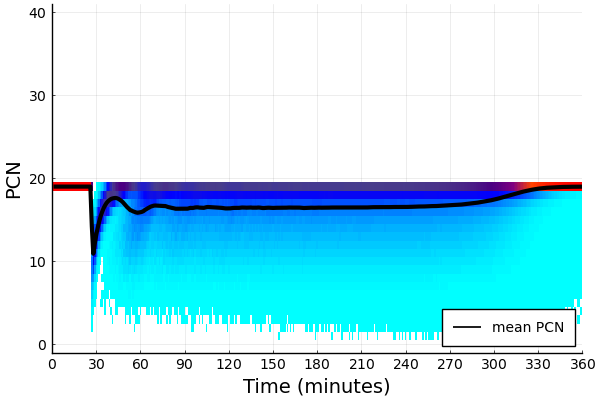

In [6]:
wcbar=false

tp11A=plotHeatbinned(Ntime_Pcounts_binsCV,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11A)
closeall()

### Plasmid dynamics without a replication noise and a priori variation
 To perform this exploration we will enforce instantaneous plasmid replication by setting a very high replication delay.  We wil also keep the equal starting ATP.


In [7]:
R0=1.0
#R0=0.25
ic=0.0
aA=ic*pMIC

T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=1000

mu=19
cv=0.0
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
end

bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_binsCVRep=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2000	0.999380038449884
1.0	3466	0.997958957149214
1.5	7279	0.9949588898420353
2.0	15484	0.9885508292482192
2.5	33051	0.9749051489078437
3.0	70144	0.9459447133930105
3.5	148168	0.8851817668716921
4.0	307566	0.7609107509120471
4.5	611213	0.5242074614633844
5.0	1055218	0.17771253846079563
5.5	1269702	0.009716507992409952
6.0	1281705	0.00021787121513305863


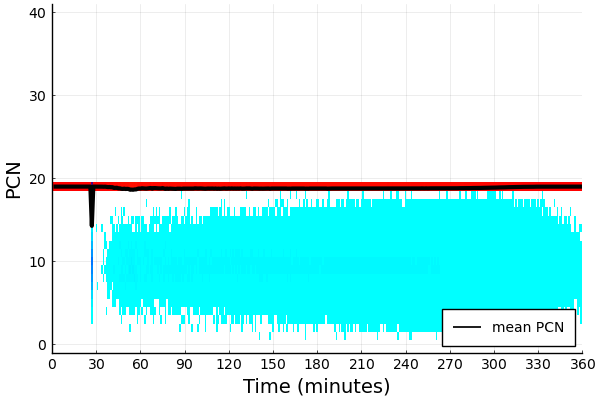

In [8]:
wcbar=false

tp11B=plotHeatbinned(Ntime_Pcounts_binsCVRep,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11B)
closeall()

### Plasmid dynamics without a segregation noise and a priori variation.
To perform this exploration we will use a secondary function that forces to divided cell to split their number of plasmids by half.


In [9]:
R0=1.0
#R0=0.25
ic=0.0
aA=ic*pMIC

T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=3

mu=19
cv=0.0
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_equal(ti, this_bst, R0, aA,antibiotic_action,lid)
end

bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_binsCVSeg=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2001	0.999380018452365
1.0	3527	0.997958077509101
1.5	7374	0.9949387502909854
2.0	15739	0.9884607188067182
2.5	33577	0.9745814663036417
3.0	71771	0.9450407361899926
3.5	152184	0.8827640747074389
4.0	317317	0.7549374458125072
4.5	631556	0.5116461831546328
5.0	1080323	0.1627450083746936
5.5	1278760	0.008024837088107296
6.0	1288680	0.00017473847924528226


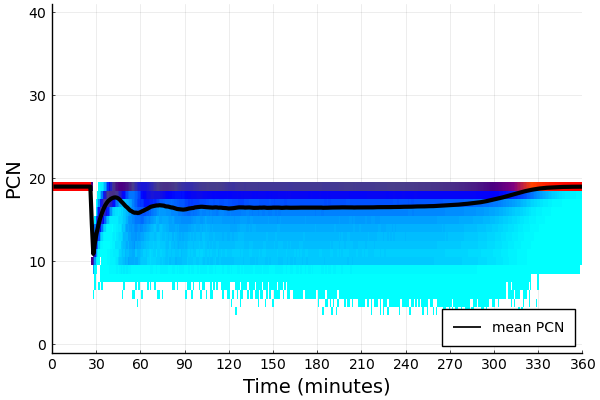

In [10]:
wcbar=false

tp11C=plotHeatbinned(Ntime_Pcounts_binsCVSeg,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11C)
closeall()

### Plasmid dynamics without any source of noise.
To perform this exploration we will use a secondary function that forces to divided cell to split their number of plasmids by half with CV=0 and high replication rate


In [11]:
R0=1.0
#R0=0.25
ic=0.0
aA=ic*pMIC

T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=500

mu=19
cv=0.0
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_equal(ti, this_bst, R0, aA,antibiotic_action,lid)
end

bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_binsCVSegRep=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2002	0.9993799984548462
1.0	3499	0.9979575177382008
1.5	7289	0.9949507580888507
2.0	15464	0.9885367019923461
2.5	33055	0.9748768546554291
3.0	70140	0.9459033859092836
3.5	148241	0.8851065391729621
4.0	307536	0.7608001438924419
4.5	611873	0.5239974927762059
5.0	1055540	0.17749338142671858
5.5	1269716	0.009695588346032225
6.0	1281854	0.00021730988517620667


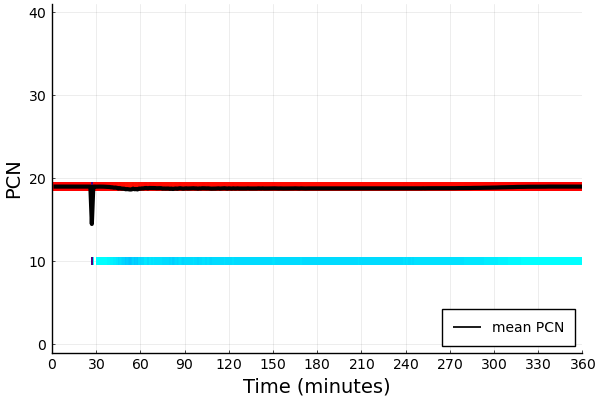

In [12]:
wcbar=false

tp11D=plotHeatbinned(Ntime_Pcounts_binsCVSegRep,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11D)
closeall()

### Plasmid dynamics with only a priori variation as a source of noise.


In [13]:
R0=1.0
#R0=0.25
ic=0.0
aA=ic*pMIC

T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=1000

mu=19
cv=0.25
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        flush(stdout)
    end
    R0,aA,lid=simulate_equal(ti, this_bst, R0, aA,antibiotic_action,lid)
end

bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_binsSegRep=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2001	0.9993804983928413
1.0	3474	0.9979585373209588
1.5	7324	0.9949585302064772
2.0	15491	0.9885568952010998
2.5	33011	0.9749157543213071
3.0	70127	0.9459863378669828
3.5	148065	0.8852773874222157
4.0	307539	0.7611328237258213
4.5	610645	0.5246815607575264
5.0	1053579	0.1783397507744452
5.5	1269261	0.009797637415779308
6.0	1281353	0.00022000478544951694


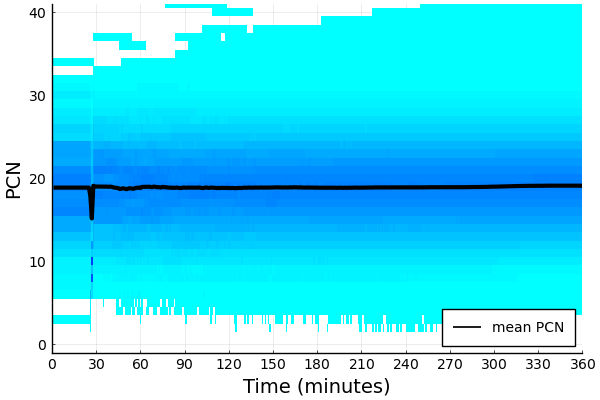

In [14]:
wcbar=false
tp11E=plotHeatbinned(Ntime_Pcounts_binsSegRep,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11E)
closeall()

### Plasmid dynamics with all sources of noise.


In [15]:
R0=1.0
#R0=0.25
aA=0.0
T=60*6
time_mins=collect(1:T)
iniCells=1000
starting_variation=false


@everywhere rep_delay=3

mu=19
cv=0.25
@everywhere p_Ndist=Normal(mu,mu*cv)

this_bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
lid=length(this_bst)
println("Time\tTotal\tResource")
for ti in time_mins
    if (ti%30==0)|(ti==1)
        ti==1 ? x=0 : x=ti/60
        println(x,"\t",length(this_bst),"\t",R0)
        #x==3.5 ? R0=0.001 : 0
        flush(stdout)
    end
    R0,aA,lid=simulate(ti, this_bst, R0, aA,antibiotic_action,lid)
end

bin_edges=collect(0:1:41)
time_Pcounts=get_timePlamids(time_mins,this_bst)
norm=true
Ntime_Pcounts_bins=binarize_timePcounts(time_Pcounts,time_mins,bin_edges,norm)
;

Time	Total	Resource
0	1000	1.0
0.5	2001	0.9993806783705318
1.0	3487	0.9979533194584546
1.5	7391	0.994924285029041
2.0	15826	0.9884276760665276
2.5	33725	0.9745113525552521
3.0	71993	0.9448581634421708
3.5	152891	0.8823073914876699
4.0	318518	0.7540330079220955
4.5	633702	0.5098986147237262
5.0	1083191	0.1609184919357888
5.5	1279391	0.007838208354668863
6.0	1289249	0.00017025610102825526


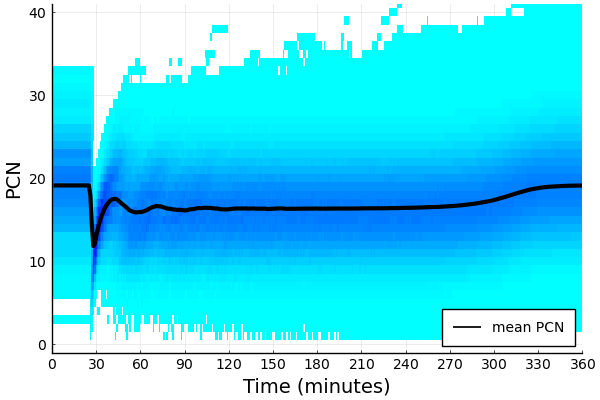

In [16]:
wcbar=false
tp11F=plotHeatbinned(Ntime_Pcounts_bins,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11F)
closeall()

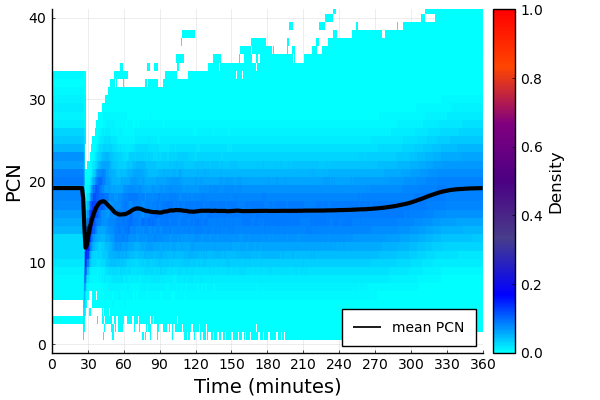

In [24]:
wcbar=true
tp11fbar=plotHeatbinned(Ntime_Pcounts_bins,time_mins,time_mins,1,bin_edges,false,wcbar)
display(tp11fbar)
closeall()

### The plot

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-11.pdf ..


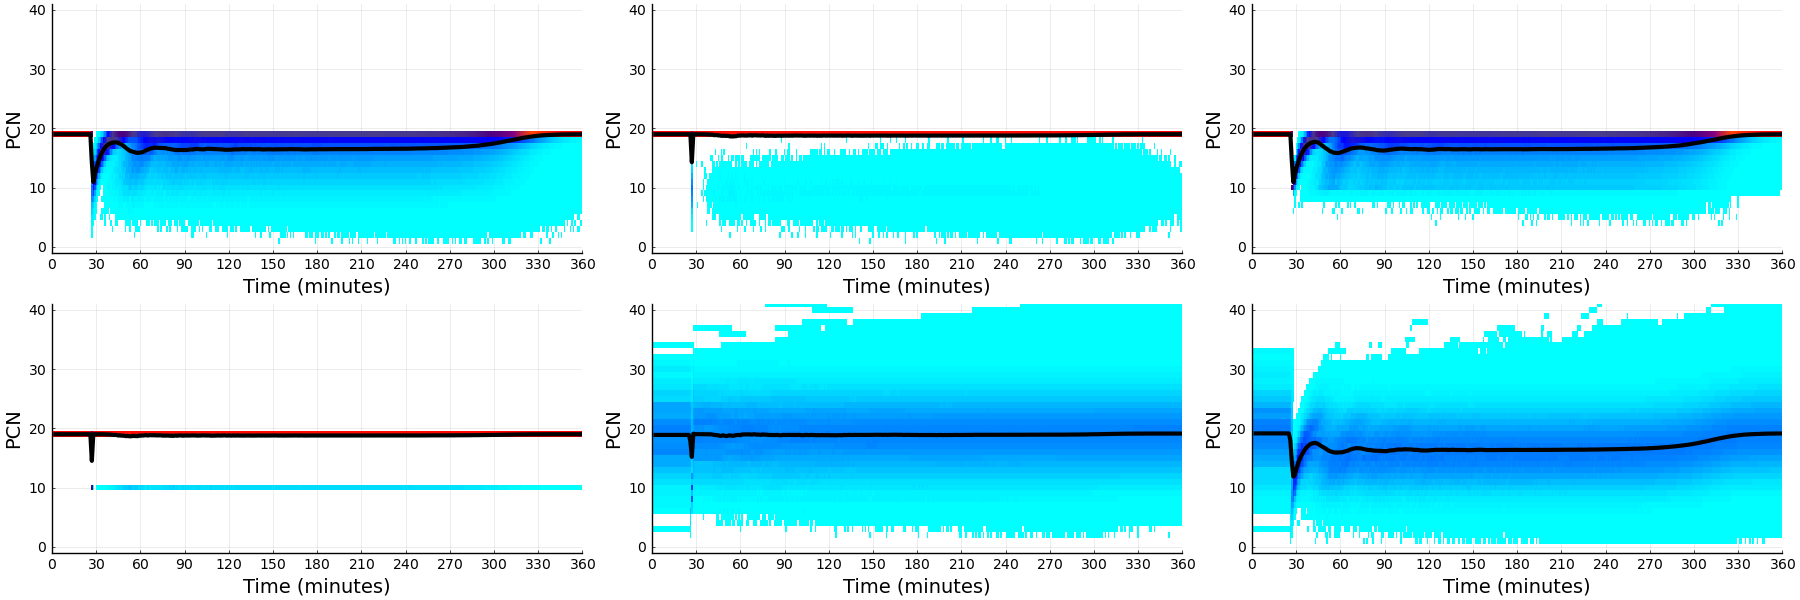

In [26]:

l = @layout [grid(2,3) ]
p11=plot(tp11A,tp11B,tp11C,
        tp11D,tp11E,tp11F,
        layout=l,size=(600*3,300*2))


#figname=pathFigures*"SI_Fig-11.pdf"
#println("Saving figure $figname ..")
#savefig(p11,figname);
display(p11)

closeall()

Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-11.pdf ..


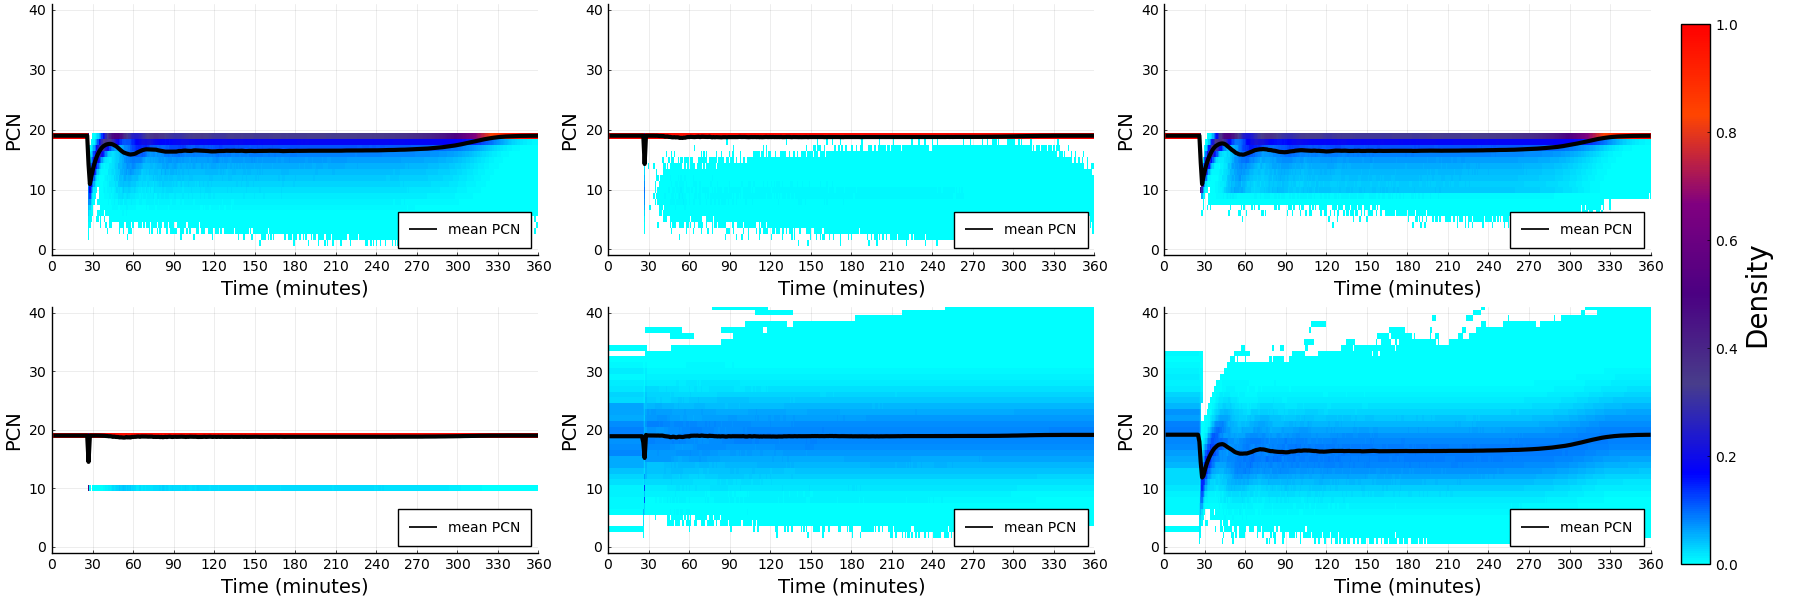

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [136]:
#l = @layout [grid(2,3) ]
l = @layout[grid(2,3) a{0.05w}]
#fig = Figure()
clims=(0.,1.)
tcp=cgrad([       colorant"cyan",
            colorant"blue", 
            colorant"darkslateblue",
            colorant"indigo",
            colorant"purple",
            colorant"orangered",
            colorant"red",
            ]) 
blank = plot(foreground_color_subplot=:white)

p11=plot(tp11A,tp11B,tp11C,
        tp11D,tp11E,tp11F,blank,
    #heatmap([0;0],  xticks=:none,yticks=:none,cbar=true,
        #heatmap((0:0.01:1).*ones(101,1),  xticks=:none, yticks=(1:20:101, string.(0:0.2:1)),cbar=false,
        #color=tcp,clim=(0.0,1)      ),
        

        layout=l,size=(600*3,300*2)#,legend=:none,#cbartitle="Density"
)
scatter!([0], [0], zcolor=[NaN], clims=(0.0,1) , label=:none, c=tcp, colorbar_title="Density", 
    background_color_subplot=:transparent, markerstrokecolor=:transparent, colorbar_ticks=(0.:0.2:1.),
    colorbar_titlefontsize=20,
    framestyle=:none, inset=bbox(0.05,- 0.01, 0.35, 0.9, :center, :right), subplot=8)

#plot!(p11,cbartitle="Density",legend=:bottomright)
#cb = Colorbar( limits=clims)
figname=pathFigures*"SI_Fig-11.pdf"
println("Saving figure $figname ..")
savefig(p11,figname);



display(p11)
closeall()

## SI Figure 12

In [145]:
mu=19.0
cv=0.4

pDistUniform=Uniform(0,mu*2)

pDistGamma=Gamma(mu,1)

a=3
b=2
beta_mean=(a/(a+b))
adj=mu/beta_mean
pDistBetaLeft=adj*Beta(a,b)
a=2
b=3
beta_mean=(a/(a+b))
adj=mu/beta_mean
pDistBetaRight=adj*Beta(a,b)

pDistBi=Biweight(mu,mu*cv)

ex=mu
w=cv*mu
a=+5
xx=sqrt(2/pi)
d=a/sqrt(1+a*a)
skn_mean=(mu+w*d*xx)
adj=mu/skn_mean
pDistSkN=adj*SkewNormal(ex,w , a)

lm=.5
lstd=lm*ℯ^cv
lmean=mean([rand(LogitNormal(lm,lstd)) for i=1:10000])
adj=mu/lmean
pDistLogN=adj*LogitNormal(lm,lstd)


pDistNormal=Normal(mu,mu*cv)
mu2=30.
pDistNormal2=Normal(mu2,mu2*cv)

pDists=[pDistUniform,pDistGamma,pDistBetaLeft,pDistBetaRight,pDistBi,pDistSkN,pDistLogN,pDistNormal,pDistNormal2]
strl=LaTeXString(L"Normal")
strl="Normal"
pD_names=["Uniform","Gamma","Beta (Left)","Beta (Right)","Biweight","SkewNormal","LogitNormal","Normal", strl]



9-element Vector{String}:
 "Uniform"
 "Gamma"
 "Beta (Left)"
 "Beta (Right)"
 "Biweight"
 "SkewNormal"
 "LogitNormal"
 "Normal"
 "Normal"

### 12A

In [146]:
@everywhere kNoise_dist=Normal(0.,.01)
mu=19.0
cv=0.4
@everywhere p_Ndist=Normal(mu,mu*cv)
@everywhere rep_delay=10
@everywhere antibiotic_action=0.7

@everywhere degAA=0

pMIC=getMIC(mu)
ic=.975
T=60*6

time_mins=collect(1:T)
iniCells=10000
starting_variation=true
aA=ic*pMIC

bin_edges=collect(0:1:80)
norm=false

pdistsLB=[]
pdistsAmp=[]

#pDists=[pDistUniform,pDistGamma,pDistBetaLeft,pDistBetaRight,pDistBi,pDistSkN,pDistLogN,pDistNormal]

for (i,pDist) in enumerate(pDists)
    i==length(pDists) ? mu=mu2 : mu=19.0
    pMIC=getMIC(mu)
    aA=ic*pMIC
    x1,x2=test_dist(pDist,aA)
    push!(pdistsLB,x1)
    push!(pdistsAmp,x2)
end


Time	Total	Resource         .	N alive Antibiotic
6.0	103738	0.9211920579189705	16995	7989.155
Time	Total	Resource         .	N alive Antibiotic
6.0	46399	0.9680159726978531	2463	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	75087	0.9447339944670698	7901	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	71135	0.9478248204519925	7944	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	59991	0.9570223763875758	4382	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	35808	0.9766199299577426	977	7989.155.15
Time	Total	Resource         .	N alive Antibiotic
6.0	70894	0.9482608412565602	6665	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	70151	0.9487152851294909	7161	7989.15.15
Time	Total	Resource         .	N alive Antibiotic
6.0	50403	0.9633491832697328	3284	12591.15.15


Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation//SI_Fig-12A.pdf ..


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


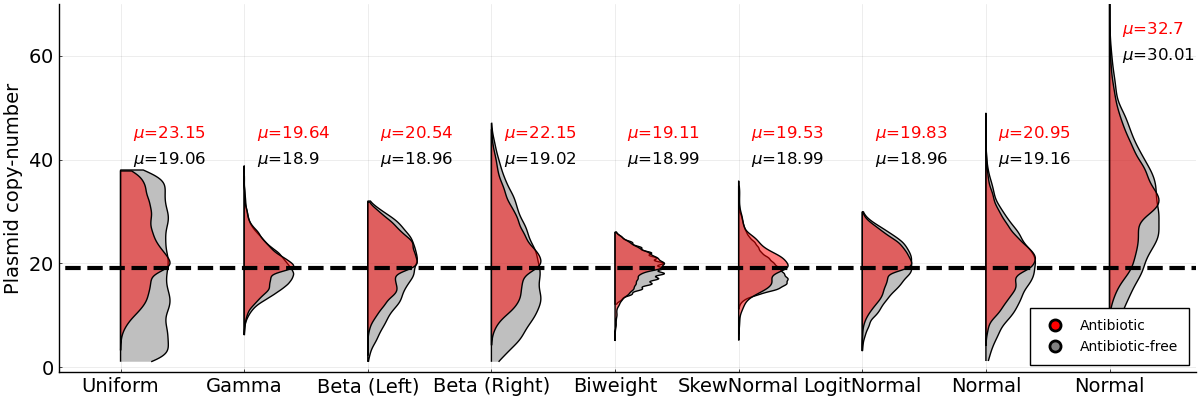

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [147]:
p12A=plot(size=(1200,400))
xs=[]
x=L"\mu"
#xx=LaTeXString("$n_alive alive bacteria out of $iniCells. $x=$tmu")
pD_names2=[]
for (i,(pLB,pAmp)) in enumerate(zip(pdistsLB,pdistsAmp))
    #i==8 ? continue : 0
    push!(pD_names2,pD_names[i])
    push!(xs,i)
    i==length(pDists) ? yi=60 : yi=40
    pLB!=[] ?  violin!([i],pLB,label=false,fill=(0.5,:gray),side=:right) : 0
    strl2=LaTeXString("$x=$(round(mean(pLB),digits=2))")
    annotate!(i+.1, yi, text(strl2, :black, :left, 12))

    pAmp!=[] ?  violin!([i],pAmp,label=false,fill=(0.5,:red),side=:right) : 0
    strl2=LaTeXString("$x=$(round(mean(pAmp),digits=2))")
    annotate!(i+.1, yi+5, text(strl2, :red, :left, 12))

end
scatter!([0],[0],color=:red ,label="Antibiotic")
scatter!([0],[0],color=:gray ,label="Antibiotic-free")

xlims!((0.5,length(xs)+0.7))
hline!([19],label=false,line=(3, :dash, :black))
plot!(xticks=(xs,pD_names2),tickfontsize = 14,xguidefontsize=12)
plot!(ylabel="Plasmid copy-number",legend=:bottomright)
ylims!((-1,70))
#plot!(yaxis=:log)



figname=pathFigures*"/SI_Fig-12A.pdf"
println("Saving figure $figname ..")
savefig(p12A,figname);
display(p12A)

closeall()

### 12B
#### Calculating survival probabilities for different antibiotic concentrations

In [142]:
ic=1.0
nrepeats=5
iniCells=10000

ics=collect(0:0.05:2)
dists_ic_sprob=[]

for (i,pDist) in enumerate(pDists)
    println(pD_names[i])
    global p_Ndist=pDist
    dist_ic_sprob=[]
    for ic in ics
        aAi=pMIC*ic
        n_total=iniCells
        n_alive=0
        plasmids_all=[]
        plasmids_alive=[]

        for rep in 1:nrepeats
            bst=getInitialPopulation(iniCells, mu, 1,starting_variation);
            for b in bst
                b.isDead = antibiotic_dynamics(b,aAi)
                b.isDead==false ? (n_alive+=1 ) : 0
            end
        end

        sprob=n_alive/(n_total*nrepeats)
        push!(dist_ic_sprob,sprob)
    end #end ic
    #println("$(dist_ic_sprob)")
    push!(dists_ic_sprob,dist_ic_sprob)
end #end pdists

Uniform
Gamma
Beta (Left)
Beta (Right)
Biweight
SkewNormal
LogitNormal
Normal


Saving figure /home/charly/Lab/Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-12B.pdf ..


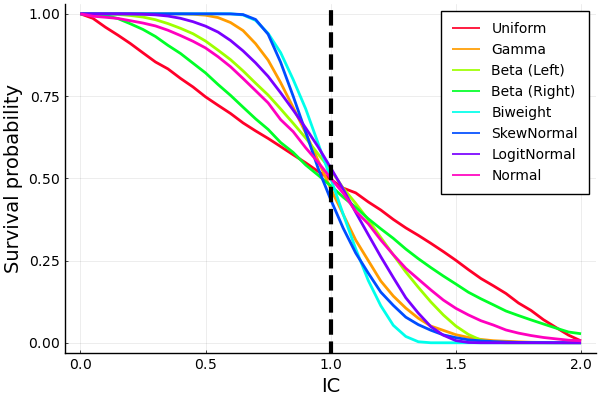

In [148]:
tp=palette(:gist_rainbow,8)
#tp=palette(:brg,8)

p12B=plot(size=(600,400))

for (i,t_survs) in enumerate(dists_ic_sprob)
    #i==8 ? continue : 0
    plot!(p12B,ics,t_survs,label=pD_names[i],lw=2,c=tp[i])
end
plot!(p12B,ylabel="Survival probability", xlabel="IC")
vline!([1],label=false,line=(3, :dash, :black))

figname=pathFigures*"SI_Fig-12B.pdf"
println("Saving figure $figname ..")
savefig(p12B,figname);
display(p12B)

closeall()